# look at enatl60 mesh mask file

In [2]:
import os, sys
import numpy as np
import dask
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *

In [1]:
from dask_jobqueue import PBSCluster
#cluster = PBSCluster(cores=1, walltime='12:00:00')
cluster = PBSCluster()
w = cluster.scale(12)
#w = cluster.scale(40)

/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask_jobqueue/config.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/distributed/deploy/local.py:138: UserWarning: diagnostics_port has been deprecated. Please use `dashboard_address=` instead
  "diagnostics_port has been deprecated. "
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/distributed/bokeh/core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
cluster

---

## notes for eNATL60 team

zarr archive for v does not contain latitude information

nav_lon, nav_lat are not useful names in the same archives

nav_lon, nav_lat are masked over land, this is not practical for plotting purposes

chunking is too small spatially


---

# browse datasets

In [12]:
def load_bathy(chunks={'x': 440, 'y': 440}):
    #grd = (xr.open_dataset(enatl60_data_dir+'mesh_mask_eNATL60_3.6_lev1.nc4', 
    grd = (xr.open_dataset(enatl60_data_dir+'mesh_mask_eNATL60_3.6.nc', 
                           chunks=chunks)
           .squeeze()
           .rename({'nav_lon':'lon','nav_lat':'lat','nav_lev':'z'})
           .set_coords(['lon','lat','z']))
    return grd

grd = load_bathy()
print(grd)

<xarray.Dataset>
Dimensions:       (x: 8354, y: 4729, z: 300)
Coordinates:
    lon           (y, x) float32 dask.array<shape=(4729, 8354), chunksize=(440, 440)>
    lat           (y, x) float32 dask.array<shape=(4729, 8354), chunksize=(440, 440)>
  * z             (z) float32 dask.array<shape=(300,), chunksize=(300,)>
Dimensions without coordinates: x, y
Data variables:
    time_counter  float64 dask.array<shape=(), chunksize=()>
    tmask         (z, y, x) int8 dask.array<shape=(300, 4729, 8354), chunksize=(300, 440, 440)>
    umask         (z, y, x) int8 dask.array<shape=(300, 4729, 8354), chunksize=(300, 440, 440)>
    vmask         (z, y, x) int8 dask.array<shape=(300, 4729, 8354), chunksize=(300, 440, 440)>
    fmask         (z, y, x) int8 dask.array<shape=(300, 4729, 8354), chunksize=(300, 440, 440)>
    tmaskutil     (y, x) int8 dask.array<shape=(4729, 8354), chunksize=(440, 440)>
    umaskutil     (y, x) int8 dask.array<shape=(4729, 8354), chunksize=(440, 440)>
    vmaskutil   

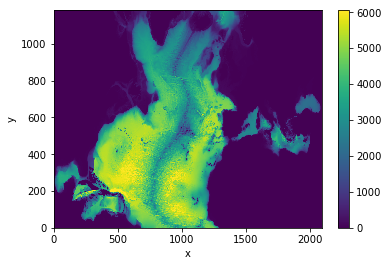

In [20]:
(grd_plt.e3t_0*grd_plt.tmask).sum('z').plot()

In [ ]:
depth = (grd.tmask*grd.e3

In [16]:
grd_plt = grd.isel(x=slice(None,None,4),y=slice(None,None,4))

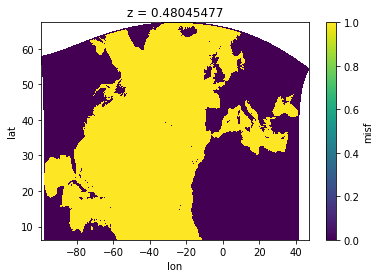

In [11]:
# misf: some sort of mask
grd_plt.misf.plot(x='lon',y='lat')

In [21]:
grd_plt.mbathy

<xarray.DataArray 'mbathy' (y: 1183, x: 2089)>
dask.array<shape=(1183, 2089), dtype=int16, chunksize=(110, 110)>
Coordinates:
    lon      (y, x) float32 dask.array<shape=(1183, 2089), chunksize=(110, 110)>
    lat      (y, x) float32 dask.array<shape=(1183, 2089), chunksize=(110, 110)>
Dimensions without coordinates: y, x

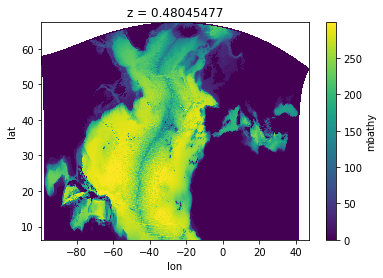

In [10]:
grd_plt.mbathy.plot(x='lon',y='lat')

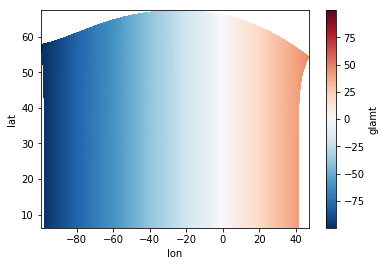

In [16]:
grd_plt.glamt.plot(x='lon',y='lat')

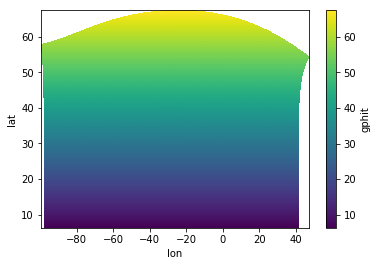

In [17]:
grd_plt.gphit.plot(x='lon',y='lat')

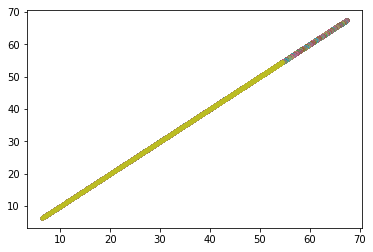

In [23]:
_ = plt.plot(grd_plt.lat, grd_plt.gphit, '.')

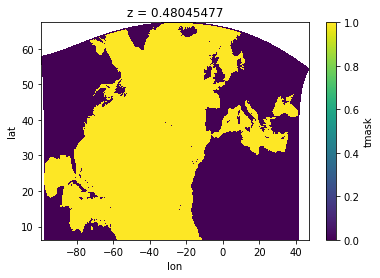

In [22]:
grd_plt.tmask.isel(z=0).plot(x='lon',y='lat')

---

In [22]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
